In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

import evaluate

from pydataset import data

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [4]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# x is total_bill
# y is tips
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(df[['total_bill']], df.tip)

# make prediction
df['yhat'] = lm.predict(df[['total_bill']])



In [5]:
df["residuals"] = df.yhat - df.tip
df["baseline"] = df.tip.mean()
df["baseline_residual"] = df.baseline - df.tip

3. Plot residuals

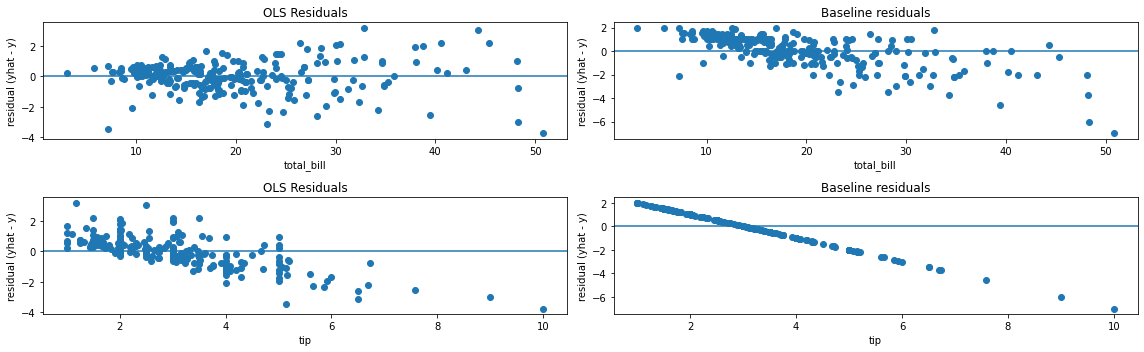

In [6]:
plt.subplots(2,2, figsize=(16,5))
plt.subplot(221)
plt.scatter(x=df.total_bill, y = df.residuals)
plt.axhline(0)
plt.xlabel('total_bill')
plt.ylabel('residual (yhat - y)')
plt.title("OLS Residuals")
plt.subplot(222)
plt.scatter(x=df.total_bill, y = df.baseline_residual)
plt.axhline(0)
plt.xlabel('total_bill')
plt.ylabel('residual (yhat - y)')
plt.title("Baseline residuals")

plt.subplot(223)
plt.scatter(x=df.tip, y = df.residuals)
plt.axhline(0)
plt.xlabel('tip')
plt.ylabel('residual (yhat - y)')
plt.title("OLS Residuals")
plt.subplot(224)
plt.scatter(x=df.tip, y = df.baseline_residual)
plt.axhline(0)
plt.xlabel('tip')
plt.ylabel('residual (yhat - y)')
plt.title("Baseline residuals")

plt.tight_layout()

3. SSE, Explained sum of squares, total sum of squares, mean squared error, RMSE for OLS model

In [7]:
SSE = (df.residuals**2).sum()

ESS = ((df.yhat - df.baseline)**2).sum()

# TSS = ((df.tip-df.baseline)**2).sum() .... OR:
TSS = SSE + ESS

MSE = SSE/len(df)

RMSE_model = MSE ** 0.5

model = {'SSE':SSE,'ESS':ESS,'TSS':TSS,'MSE':MSE, 'RMSE':RMSE_model}

4. SSE, Explained sum of squares, total sum of squares, mean squared error, RMSE for Baseline

In [8]:
SSE = (df.baseline_residual**2).sum()

ESS = ((df.baseline - df.baseline)**2).sum()

# TSS = ((df.tip-df.baseline)**2).sum() .... OR:
TSS = SSE + ESS

MSE = SSE/len(df)

RMSE_base = MSE ** 0.5

base = {'SSE':SSE,'ESS':ESS,'TSS':TSS,'MSE':MSE, 'RMSE':RMSE_base}

In [9]:
results = pd.DataFrame(data=[model,base], index = ['model','base']).T

In [10]:
results

,model,base
SSE,252.788744,465.212477
ESS,212.423733,0.000000
TSS,465.212477,465.212477
MSE,1.036019,1.906609
RMSE,1.017850,1.380800


6. Compare performance

In [11]:
print("Model is better than baseline (SSE is less): ", results.model.SSE<results.base.SSE)

Model is better than baseline (SSE is less):  True


7. Expected variance / R2

In [12]:
R2_model = results.model.ESS/results.model.TSS

In [13]:
R2_model

0.45661658635167657

8. Is model better than the baseline?

In [14]:
R2_baseline = explained_variance_score(df.tip, df.baseline)

In [15]:
R2_baseline

1.1102230246251565e-16

In [16]:
print("OLS model is better than baseline (R2 is less): ", R2_model<R2_baseline)

OLS model is better than baseline (R2 is less):  False


### Model is superior to baseline for SSE and RMSE but inferior based on R2 value

#### Using functions in evaluate.py to determine if model better than baseline (based on RMSE)

In [17]:
evaluate.better_than_baseline(df.tip, df.yhat)

True

### 10. mpg dataset, fit model predicting highway mileage based on engine displacement

In [18]:
mpg = data('mpg')

In [19]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [20]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# x is displacement
# y is hwy (mpg)
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(mpg[['displ']], mpg.hwy)

# make prediction
mpg['yhat'] = lm.predict(mpg[['displ']])



In [21]:
mpg["residuals"] = mpg.yhat - mpg.hwy
mpg["baseline"] = mpg.hwy.mean()
mpg["baseline_residual"] = mpg.baseline - mpg.hwy

Plot residuals

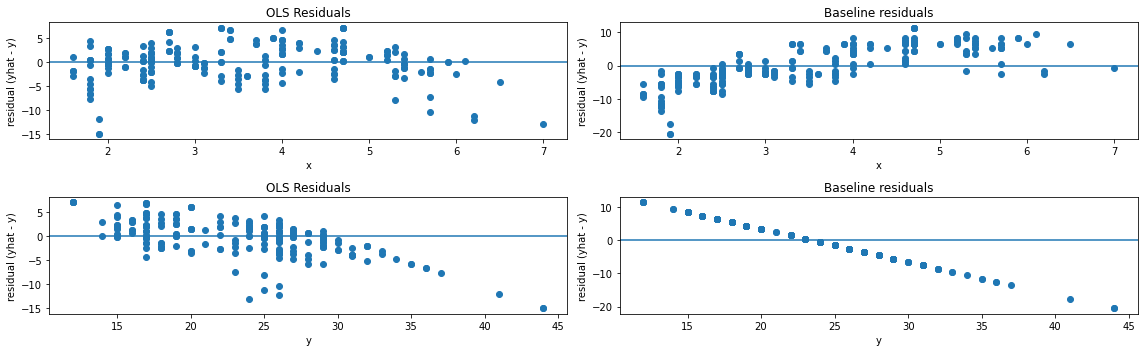

In [22]:
evaluate.plot_residuals(mpg.displ, mpg.hwy, mpg.yhat)

In [23]:
evaluate.regression_errors(mpg.hwy, mpg.yhat)

{'SSE': 3413.829008995464,
 'ESS': 4847.833384166923,
 'TSS': 8261.662393162387,
 'MSE': 14.589012858954973,
 'RMSE': 3.8195566312014506,
 'R2': 0.586786672398904}

In [24]:
evaluate.baseline_mean_errors(mpg.hwy)

{'SSE': 8261.662393162384, 'MSE': 35.30624954342902, 'RMSE': 5.941906221359356}

In [25]:
evaluate.better_than_baseline(mpg.hwy, mpg.yhat)

True